In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:

import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:

import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Obtain the imdb review dataset from tensorflow datasets
dataset = tfds.load('imdb_reviews', as_supervised=True)

# Seperate test and train datasets
train_dataset, test_dataset = dataset['train'], dataset['test']
print(dataset)
# Split the test and train data into batches of 32
# and shuffling the training set
batch_size = 32
train_dataset = train_dataset.shuffle(10000)
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIUKAW9/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIUKAW9/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIUKAW9/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('unsupervised'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


In [ ]:
example, label = next(iter(train_dataset))
print('Text:\n', example.numpy()[0])
print('\nLabel: ', label.numpy()[0])


Text:
 b'This is almost typical Lynch. However, What makes this film slightly unusual for Lynch is the fact that it looks very raw, almost amateurish. But i believe Lynch does this on purpose to give a greater sense of realism, which serves to increase the intensity of surreal moments.<br /><br />However, a lot of Typical Lynch motifs are present, such as: floating camera work; haunting music; long (excruciating) pauses; hanging curtains; dim lights growing darker at a slow (almost indiscernible) pace; extreme close ups; themes of women in trouble; over-bearing, incompassionate, all knowing characters facing off with characters who are distraught, temporarily oblivious, in the dark and so on...<br /><br />The performances are great and the short is thought provoking. As usual, Lynch leaves almost everything up to interpretation. Many questions are left unanswered and this ignites the imagination.<br /><br />Another brilliant effort from Lynch. I only hope he makes some shorts, more alo

In [ ]:
# Using the TextVectorization layer to normalize, split, and map strings
# to integers.
encoder = tf.keras.layers.TextVectorization(max_tokens=10000)
encoder.adapt(train_dataset.map(lambda text, _: text))

# Extracting the vocabulary from the TextVectorization layer.
vocabulary = np.array(encoder.get_vocabulary())

# Encoding a test example and decoding it back.
original_text = example.numpy()[0]
encoded_text = encoder(original_text).numpy()
decoded_text = ' '.join(vocabulary[encoded_text])

print('original: ', original_text)
print('encoded: ', encoded_text)
print('decoded: ', decoded_text)


original:  b'This is almost typical Lynch. However, What makes this film slightly unusual for Lynch is the fact that it looks very raw, almost amateurish. But i believe Lynch does this on purpose to give a greater sense of realism, which serves to increase the intensity of surreal moments.<br /><br />However, a lot of Typical Lynch motifs are present, such as: floating camera work; haunting music; long (excruciating) pauses; hanging curtains; dim lights growing darker at a slow (almost indiscernible) pace; extreme close ups; themes of women in trouble; over-bearing, incompassionate, all knowing characters facing off with characters who are distraught, temporarily oblivious, in the dark and so on...<br /><br />The performances are great and the short is thought provoking. As usual, Lynch leaves almost everything up to interpretation. Many questions are left unanswered and this ignites the imagination.<br /><br />Another brilliant effort from Lynch. I only hope he makes some shorts, more

In [ ]:
# Creating the model
model = tf.keras.Sequential([
	encoder,
	tf.keras.layers.Embedding(
		len(encoder.get_vocabulary()), 64, mask_zero=True),
	tf.keras.layers.Bidirectional(
		tf.keras.layers.LSTM(64, return_sequences=True)),
	tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
	tf.keras.layers.Dense(64, activation='relu'),
	tf.keras.layers.Dense(1)
])

# Summary of the model
model.summary()

# Compile the model
model.compile(
	loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
	optimizer=tf.keras.optimizers.Adam(),
	metrics=['accuracy']
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

In [ ]:
# Training the model and validating it on test set
history = model.fit(
	train_dataset,
	epochs=5,
	validation_data=test_dataset,
)


In [22]:
#model.save("med", save_format="tf")
model.save("/content/mo.tf")

In [23]:
!zip -r /content/mo.zip /content/mo.tf

  adding: content/mo.tf/ (stored 0%)
  adding: content/mo.tf/keras_metadata.pb (deflated 92%)
  adding: content/mo.tf/variables/ (stored 0%)
  adding: content/mo.tf/variables/variables.index (deflated 66%)
  adding: content/mo.tf/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/mo.tf/fingerprint.pb (stored 0%)
  adding: content/mo.tf/assets/ (stored 0%)
  adding: content/mo.tf/saved_model.pb (deflated 89%)


In [24]:
from google.colab import files
files.download("/content/mo.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
#model.save('my_model.keras')
model.save("model.keras", save_format="keras")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
# Save the model in Colab
model.save("/content/mm")


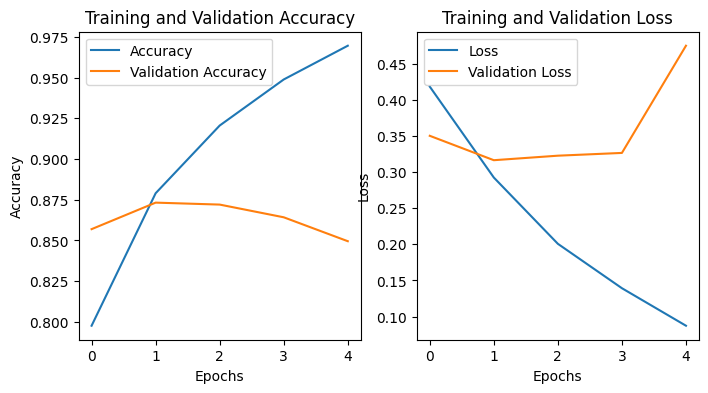

In [ ]:
# Plotting the accuracy and loss over time

# Training history
history_dict = history.history

# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()


In [ ]:
# Making predictions
sample_text = (
	'''The movie by ENSA berrechid was so good and the animation are so dope.
	I would recommend my friends to watch it.'''
)
predictions = model.predict(np.array([sample_text]))
print(*predictions[0])

# Print the label based on the prediction
if predictions[0] > 0:
	print('The review is positive')
else:
	print('The review is negative')


1/1 [==============================] - 4s 4s/step
5.9595346
The review is positive
